# Import packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import time
import ROOT
import pandas as pd
from root_pandas import read_root
from matplotlib.ticker import NullFormatter
import matplotlib as mpl
mpl.rcParams.update({'font.size': 16})
mpl.rcParams.update({'xtick.labelsize': 16}) 
mpl.rcParams.update({'ytick.labelsize': 16}) 


Welcome to JupyROOT 6.09/01


# Defines how to get dataframe from ROOT TTree

In [2]:
def getData(inputFiles):
   
    cols = ['cluster_pt','cluster_eta','cluster_phi','cluster_e_cross','cluster_e','cluster_ncell','cluster_iso_tpc_04','cluster_iso_its_04','cluster_NN1','cluster_NN2','cluster_Lambda']
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print 'Processed', inputFilename, 'in',  end-start, 'seconds'
    return pd.concat([x for x in dataframes])

# Gets dataframes from dataset(s)

In [15]:
# NTuples found in /project/projectdirs/alice/NTuples
#mcFiles = ["16c3b_small.root"]
mcFiles = ["16c3b_small.root"]
dataFiles = ["13def_small.root"]#,"13e_small.root",'13e_small.root']
mcHists = getData(mcFiles)
dataHists = getData(dataFiles)



Processed 16c3b_small.root in 12.5854198933 seconds
Processed 13def_small.root in 100.758224964 seconds


# Define cuts

In [16]:
def applyCuts(data):
    data.eval('ecrossOvere = cluster_e_cross/cluster_e', inplace=True)
    print 'Before cuts' , data.shape
    data = data.query('cluster_pt>8.0')
    print 'Ater pt > 8 GeV cut ' , data.shape
    data = data.query('ecrossOvere>0.03')
    print 'After ecross/e > 0.03 cut' , data.shape
    data = data.query('cluster_NN2<1.0 and cluster_NN2>0')
    print 'After NN2 within (0.1) ', data.shape
    data = data.query('cluster_NN1<1.0 and cluster_NN1>0')
    print 'After NN2 within (0.1)', data.shape
    data = data.query('cluster_iso_tpc_04<100')
    print 'After iso < 100 cut ', data.shape
    data = data.query('cluster_ncell>2')
    print 'After ncell > 2 cut ', data.shape
    data = data.query('cluster_Lambda<2.0')
    print 'After lambda < 2.0 ' , data.shape
    #print data.head(5)
    #print data.shape
    #print data[0].count()
    return data

# Apply cuts

In [17]:
dataHists = applyCuts(dataHists)
mcHists = applyCuts(mcHists)

Before cuts (29748486, 13)
Ater pt > 8 GeV cut  (1052319, 13)
After ecross/e > 0.03 cut (825806, 13)
After NN2 within (0.1)  (819834, 13)
After NN2 within (0.1) (785174, 13)
After iso < 100 cut  (784355, 13)
After ncell > 2 cut  (783560, 13)
After lambda < 2.0  (782441, 13)
Before cuts (3013289, 13)
Ater pt > 8 GeV cut  (275653, 13)
After ecross/e > 0.03 cut (274274, 13)
After NN2 within (0.1)  (274198, 13)
After NN2 within (0.1) (273605, 13)
After iso < 100 cut  (273605, 13)
After ncell > 2 cut  (273229, 13)
After lambda < 2.0  (273094, 13)


In [36]:

def plotcorr(histo,label,figname):
    x = histo['cluster_NN1']
    y = histo['cluster_Lambda']
    nullfmt = NullFormatter()         # no labels
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    bottom_h = left_h = left + width + 0.04
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.2]
    rect_histy = [left_h, bottom, 0.2, height]
    fig = plt.figure(1, figsize=(8, 8))
    axScatter = plt.axes(rect_scatter)
    axHistx = plt.axes(rect_histx)
    axHisty = plt.axes(rect_histy)
    axHistx.xaxis.set_major_formatter(nullfmt) #no labels
    axHisty.yaxis.set_major_formatter(nullfmt)
    hb = axScatter.hexbin(x, y, cmap='viridis') #gridsize=60
    axScatter.plot((0, 1), (0.27, 0.27), 'r-',linestyle=':')
    axScatter.plot((0.85, 0.85), (0, 1.0), 'r-',linestyle=':')
    plt.text(0.22, 0.90,label, horizontalalignment='center',  verticalalignment='center', transform=axScatter.transAxes, bbox=dict(facecolor='white', alpha=0.75))
    binwidth = 0.25
    xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
    lim = (int(xymax/binwidth) + 1) * binwidth
    axScatter.set_xlim((0.0, 1.0))
    axScatter.set_ylim((0.0, 1.0))
    axScatter.set_xlabel('NN output')
    axScatter.set_ylabel('Lambda')
    n, bins, patches = axHistx.hist(x,50, range=(0, 1.0))
    axHisty.hist(y,50, range=(0.0,1.0), orientation='horizontal')
    axHistx.set_xlim(axScatter.get_xlim())
    axHisty.set_ylim(axScatter.get_ylim())
    plt.show()
    fig.savefig('../JupyterPNGOutput/'+figname+'.png', dpi=fig.dpi)
    return n, bins
    

In [28]:
def cutptrange(data, ptmin, ptmax):
    full = data
    iso = data.query('cluster_iso_tpc_04<5')
    noniso = data.query('cluster_iso_tpc_04>10')
    full = full.query('cluster_pt>%f and cluster_pt<%f' %(ptmin,ptmax))
    iso = iso.query('cluster_pt>%f and cluster_pt<%f' %(ptmin,ptmax))
    noniso = noniso.query('cluster_pt>%f and cluster_pt<%f' %(ptmin,ptmax))
    return full, iso, noniso  

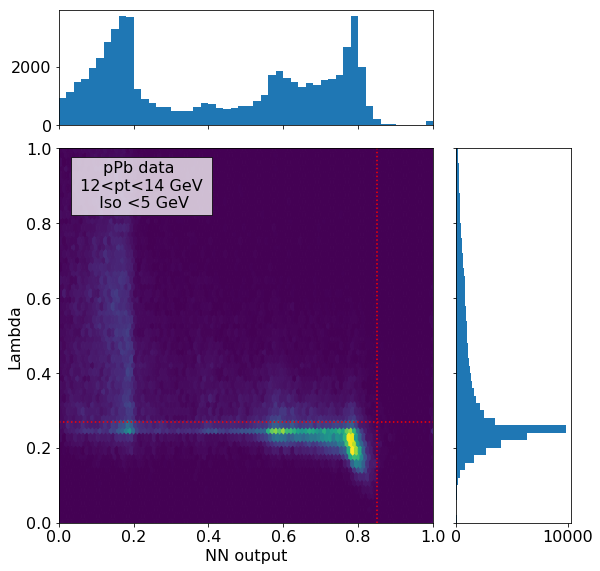

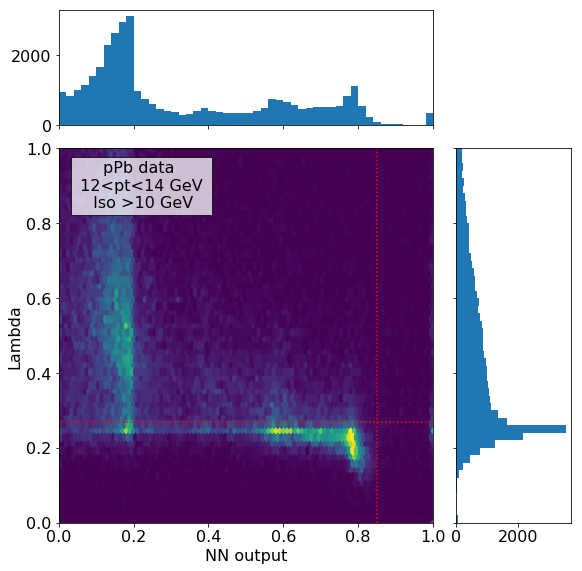

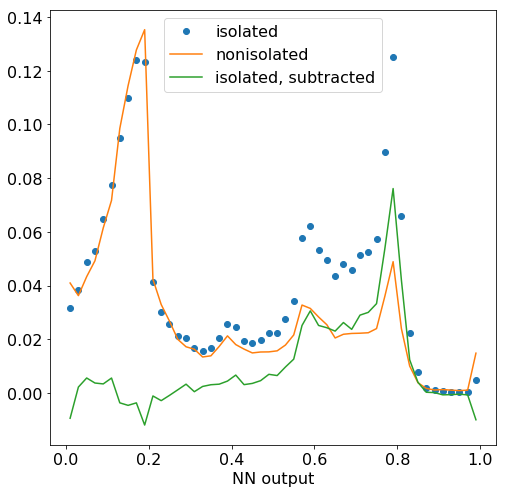

[ 0.03150159  0.03841657  0.04887256  0.05291465  0.06480708  0.07726741
  0.09480541  0.10980458  0.12403541  0.12333389  0.04118924  0.03003174
  0.02582262  0.02111241  0.0204443   0.01673626  0.0158009   0.01686988
  0.02057792  0.02565559  0.02465342  0.01940872  0.01843995  0.01980959
  0.0222148   0.02214799  0.0274929   0.03417404  0.05785869  0.06203441
  0.05341573  0.04967429  0.04349424  0.04807082  0.04583264  0.05121096
  0.05241356  0.05722399  0.08966093  0.12500418  0.06600969  0.02234842
  0.00775013  0.00193753  0.00120261  0.00053449  0.00040087  0.00040087
  0.00030065  0.00481042] [ 0.01  0.03  0.05  0.07  0.09  0.11  0.13  0.15  0.17  0.19  0.21  0.23
  0.25  0.27  0.29  0.31  0.33  0.35  0.37  0.39  0.41  0.43  0.45  0.47
  0.49  0.51  0.53  0.55  0.57  0.59  0.61  0.63  0.65  0.67  0.69  0.71
  0.73  0.75  0.77  0.79  0.81  0.83  0.85  0.87  0.89  0.91  0.93  0.95
  0.97  0.99]
0.904359445465


In [67]:
binedges = [12.0, 14.0]#,12.0,14.0,16.0]#,18.0,20.0,22.0,24.0,26.0,28.0]
#binedges = [16.0,18.0,20.0,22.0,24.0,26.0,28.0,30.0,50.0]
#full, iso, noniso = cutptrange(dataHists, 8.0, 12.0)
#plotcorr(full,'pPb data \n 12 <pt < 14 GeV','all')

for ipt in range(len(binedges)-1):
    ptmin = binedges[ipt]
    ptmax = binedges[ipt+1]
    #full, iso, noniso = cutptrange(mcHists, ptmin, ptmax)
    #plotcorr(full,'Dijet MC \n %2.0f<pT<%2.0f GeV' %(ptmin,ptmax),'all_MC_%2.0f_%2.0f' %(ptmin,ptmax))
    full, iso, noniso = cutptrange(dataHists, ptmin, ptmax)
    #plotcorr(full,'pPb data \n %2.0f<pt<%2.0f GeV' %(ptmin,ptmax),'all_Data%2.0f_%2.0f' %(ptmin,ptmax))
    hiso, binedgesiso = plotcorr(iso,'pPb data \n %2.0f<pt<%2.0f GeV \n Iso <5 GeV' %(ptmin,ptmax),'all_Data%2.0f_%2.0f' %(ptmin,ptmax))
    hnoniso,binedgesnoniso = plotcorr(noniso,'pPb data \n %2.0f<pt<%2.0f GeV \n Iso >10 GeV' %(ptmin,ptmax),'all_Data%2.0f_%2.0f' %(ptmin,ptmax))
    

    binedgesiso= np.delete(binedgesiso,-1)
    binedgesiso = np.add( binedgesiso, (binedgesiso[1]-binedgesiso[0])/2.0 )
    scale = np.sum(hiso[:20])
    hiso = np.divide(hiso,scale)
    scale = np.sum(hnoniso[:20])
    hnoniso = np.divide(hnoniso,scale)
    pure = np.subtract(hiso,hnoniso)
    
    
    fig = plt.figure(2, figsize=(8, 8))
    
    plt.plot(binedgesiso, hiso, 'o', label= 'isolated')
    plt.plot(binedgesiso, hnoniso, label = 'nonisolated')
    plt.plot(binedgesiso, pure, label='isolated, subtracted')
    plt.legend()
    plt.xlabel('NN output')
    plt.show()
    print hiso,

    print binedgesiso
    print np.sum(hiso[:15])
